In [27]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving output.PNG to output.PNG


# Sentiment in text

We'll start by looking at sentiment in text, and learn how to build models that understand text that are trained on labeled text, and then can then classify new text based on what they've seen.

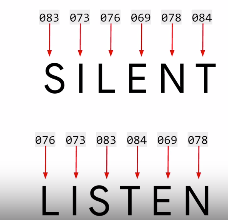

In [7]:
Image('nlp.PNG', width = 300)

比如用word 的 ASCII values, Silent and listen has the exactly same letters but opposite meaning.

Another way to do it to create a token for each words

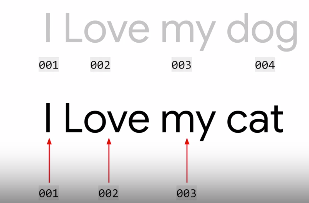

In [11]:
Image('nlp2.PNG', width = 300)

if you create a trainning set based on lots of text, you usually don't know how many unique words in text. By specifying ```num_words = 100``` in ```Tokenizer```, Tokenizer will **specify top 100 words by volumn and encode those**. Sometimes less word can lead to more accuracy but huge in training times

Note:
 
*   space, punctuation like comma, exclaimation has been removed
*   lowercase and upper case map to the same token, all to lowercase
*  **texts_to_sequences**: token replace words into a list of texts. 
      1.     It can pass any set of sentences, so it can encode them based on word set it learned from the one that was passed into, and ignore those not passed into before
      2.     In practice, instead of ignoring unseen word, put a special value when unseen word is encountered 

We really need a *lot of training data* to get broad vocabulary. 


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

# sentences of different lengths
sentences = [
     "I love my dog",        
     "I, love my cat",
     "You love my dog!", # ! won't impact token as dog!
     "Do you think my dog is amazing?"
]

tokenizer = Tokenizer(num_words = 100) 
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index # return dictinary key(word) value(token) pair

sequences = tokenizer.texts_to_sequences(sentences) #transform each text in texts into integers from token

print(word_index)
print(sequences)

test_data = [
             "i really love my dog",
             "my dog loves my manatee"
]

test_seq = tokenizer.texts_to_sequences(test_data)
# i really love my dog, 
#  [4,2,1,3]  :  really is being lost as the word is not in word_index
# my dog loves my manatee
#  [1,3,1]    :  my dog my            

print(test_seq)

#***************************************************************
# Instead of ignoring unseen word, put special value for it 
#***************************************************************
tokenizer = Tokenizer(num_words = 100, oov_token = "<oov>")  #oov: out-of-vocabulary
tokenizer.fit_on_texts(sentences)
test_seq = tokenizer.texts_to_sequences(test_data)
word_index = tokenizer.word_index
print("\n", word_index)
print(test_seq)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]
[[4, 2, 1, 3], [1, 3, 1]]

 {'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


## Padding

the list of sentences has been padded out into a matrix and **each row** in matrix has the **same length**, by putting appropriate number of zeros before the sentence


**padding before sentence** 

```python
 pad_sequences(sequences)
```

**padding after sentence **

```python
 pad_sequences(sequences, padding='post')
```

matrix **width** is default the longest sentences, change it by.  

```python
 pad_sequences(sequences, padding = "post", maxlen = 5)
 # if all sentences less than 5, all will pad  to length of 5
```

*If I have a sentence longer than maxlen, I'll lose information*, default is pre-padding, lose the beginning of the sentences. can *specify lose at the end of sentences*

```python
 pad_sequences(sequences, padding = "post", truncating='post', maxlen = 5)
```


In [2]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #for padding 

# sentences of different lengths
sentences = [
     "I love my dog",        
     "I, love my cat",
     "You love my dog!", # ! won't impact token as dog!
     "Do you think my dog is amazing?"
]

#***************************************************************
# Padding
#***************************************************************
tokenizer = Tokenizer(num_words = 100, oov_token = "<unk>") 
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences) #transform each text in texts into integers from token

padded = pad_sequences(sequences)
print(word_index)
print(sequences)
print(padded)


padded = pad_sequences(sequences, padding = 'post')
print(padded[0])



{'<unk>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]
[5 3 2 4 0 0 0]


### Sarcasm Dataset

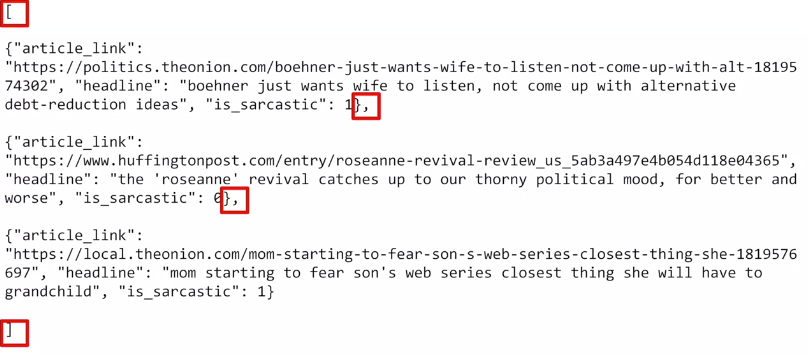

In [25]:
Image('Sarcasm.PNG', width = 600)

In [ ]:
import json 

with open("sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []
urls = [] #not really used in model
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<oov>") # will see all words in the sequence
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding = 'post')
print(padded[0])
print(padded.shape)

Here is the output, total sentences is 26709 the longest sentence is 40 words

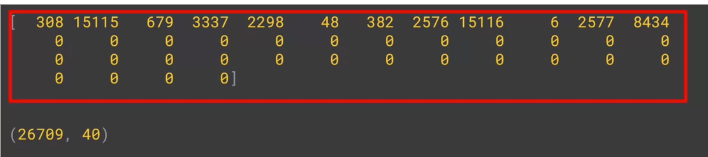

In [30]:
Image('output.PNG', width = 600)